<a href="https://colab.research.google.com/github/allaalmouiz/gaussianNB_iris/blob/main/gaussianNB_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes: Iris Challange - Module 2 | Part 2
Submitted by: **`Alaa Almouiz F. Moh.`**

ID Number: **`S2026_176`**

Track: **Machine Learning**

For: **ZAKA ©**

## **1- Problem Statement (Objective)**

I saw an iris rose, measures it's sepal length and width and also did the same for the petal. How to predict it's type?

My target here is building a machine learning model that predicts the `species` of an iris flower based on its measurements **Classification Model**.
1. Implement Gaussian Naive Bayes from scratch.
2. Implemet the scikit-learn’s version.
3. Evaluate both models' performance.

### **Dataset**
Iris Dataset (Download here: [Data](https://drive.google.com/file/d/1kOZgprQhpJ0EQkCU-WBhE5Y8toW8bHnk/view)).
The dataset variables include:

* `sepal length (cm)`
* `sepal width (cm)`
* `petal length (cm)`
* `petal width (cm)`
* `target`: Setosa (0), VersiColour (1), and Virginica (2)

## 2- Data Preparation

**Import necessary python modules**

We will need the following libraries:

* Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
* Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
* Matplotlib — plotting & visualization.
* scikit-learn — a tool for data mining and machine learning models.



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

In [47]:
# The iris Dataset is already in SiKiLearn library
iris = datasets.load_iris()

In [48]:
# The dataset is already a dictionary that contains the following keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
# Creating a dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [50]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## **3- EDA: Understanding the Dataset**



In [51]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print(f'The dataset has {n_rows} rows and {n_cols} columns')

The dataset has 150 rows and 5 columns


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


The data type for all the data is `float64` and there's no null values

In [53]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [54]:
# Removing the white spaces from the names of columns

df.columns = df.columns.str.replace(' ', '_')

In [55]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [56]:
df.describe()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [72]:
# Checking Duplicates

df.duplicated().sum()

np.int64(1)

There's one duplicate, we can drop it.

In [74]:
df = df.drop_duplicates()
print(len(df))

149


## **4- Visualization Stage**

### **A: Correlation between the numerical features** - Heatmap

Text(0.5, 1.0, 'Features Correlation Heatmap')

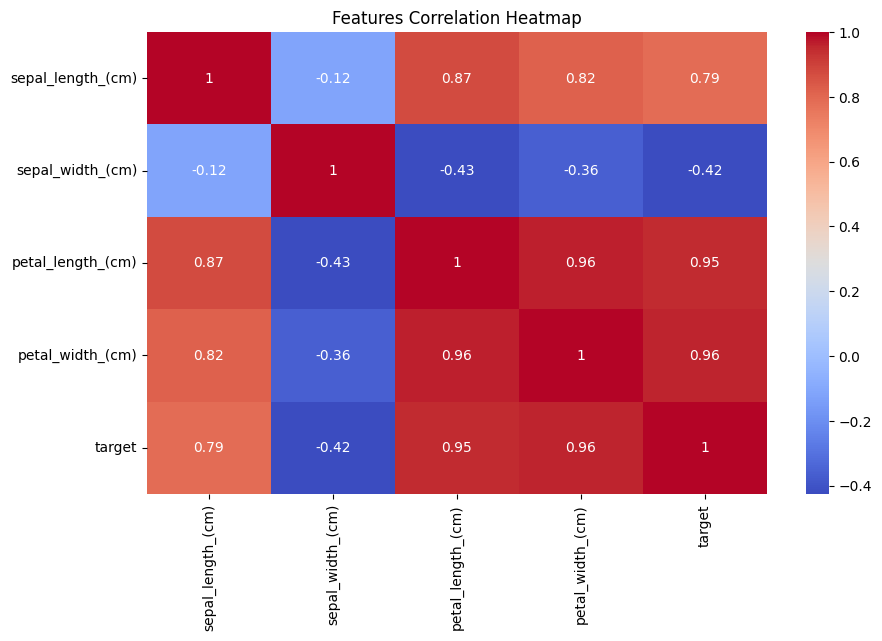

In [75]:
# Heat map for correlation

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Features Correlation Heatmap")

**First pattern to notice:**

From the Heatmap it's clear that the `petal_length_(cm)` and the `petal_width_(cm)` have a high **positive correaltion** ~0.95 with the target, therefore, they play a huge rule in determing the type of the iris rose.

while the `sepal_length_(cm)` have weak positive correlation with the target.


### **B: Pair plot for the features of the Iris flowers** - Pair plot and KDEs

<Figure size 800x500 with 0 Axes>

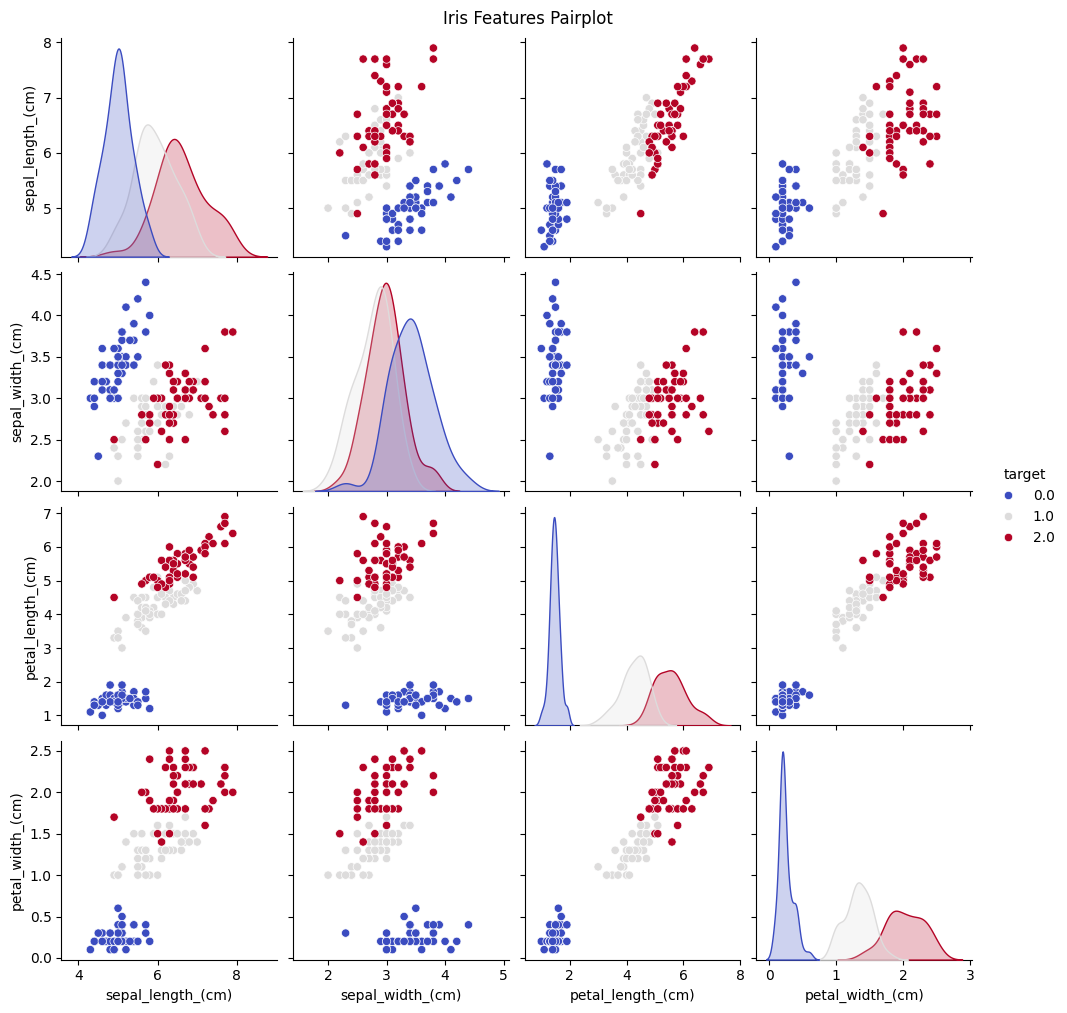

In [76]:
plt.figure(figsize= (8,5))

sns.pairplot(df, hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle('Iris Features Pairplot', y=1.01)
plt.show()

**Second pattern to notice**

From the Kdes, Versicolor (1) and Virginica (2) overlap in sepal features, unlike Setosa (0) which have it's own ranges specially in petal features.

## **Building the ML Models**

### **Part One:** Gaussian Naive Bayes From Scratch

#### Preparing the data before feeding it into the model

In [77]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [79]:
# Storing the datset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [80]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (149, 4)
y shape: (149,)


#### Splitting the Dataset into `X_train`, `X_test`, `y_train`, and `y_test`.

In [81]:
# Splitting the dataset into testing and training

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [82]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (119, 4)
X_test shape: (30, 4)
y_train shape: (119,)
y_test shape: (30,)


In [83]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [84]:
y_train[:5]

array([0., 0., 1., 0., 0.])

#### Standerdizing the dataset

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
print(f"X_train_scalaed: ", X_train_scaled[:5])
print("")
print(f"X_test_scaled: ", X_test_scaled[:5])

X_train_scalaed:  [[-1.47286067  1.25077879 -1.55015743 -1.30727768]
 [-0.14230538  3.0604162  -1.26565907 -1.03952201]
 [ 1.06729034  0.11975542  0.38443139  0.29925634]
 [-1.23094153  0.79836944 -1.2087594  -1.30727768]
 [-1.71477982  0.34596009 -1.37945841 -1.30727768]]

X_test_scaled:  [[ 0.34153291 -0.55885861  0.55513041  0.03150067]
 [-0.14230538  1.70318815 -1.15185973 -1.17339984]
 [ 2.27688606  1.70318815  1.69312383  1.37027901]
 [ 0.22057334 -0.33265393  0.44133106  0.43313417]
 [ 1.18824991 -0.55885861  0.61203008  0.29925634]]


### **Part Two:** Sci-Kit Learn Gaussuian Naive Bayes